In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load Dataset

In [2]:
dd = pd.read_csv('diabetes.csv')

In [3]:
dd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
dd['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Data dan label dipisah

In [5]:
X = dd.drop (columns='Outcome', axis=1)
Y = dd['Outcome']

In [6]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Standar Data

In [8]:
scaler = StandardScaler()

In [9]:
scaler.fit(X)

StandardScaler()

In [10]:
standard_data = scaler.transform(X)

In [11]:
standard_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [12]:
X = standard_data
Y = dd['Outcome']

In [13]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


<BarContainer object of 2 artists>

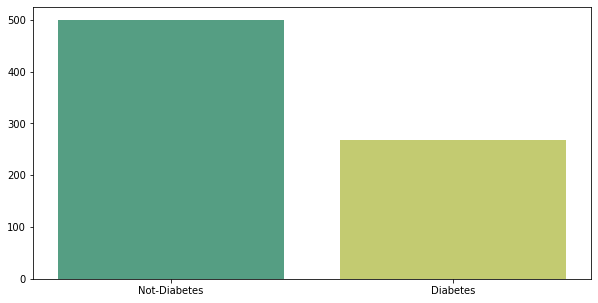

In [162]:
fig, ax1 = plt.subplots(figsize=(10,5)) 


count = dd['Outcome'].value_counts()
perc  = (count/len(data))*100


labels = ['Not-Diabetes','Diabetes']
colors = ['#559e83','#c3cb71']
bsizes = [count[0],count[1]]
sizes = [perc[0],perc[1]]

ax1.bar(labels,bsizes,label=labels, color=colors)

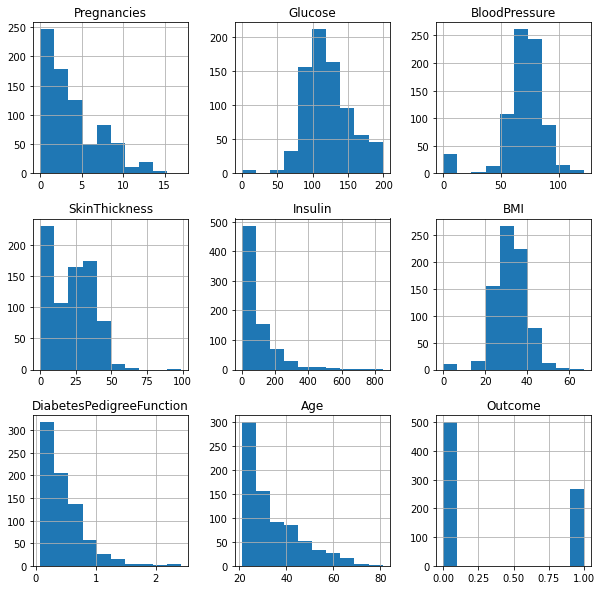

In [165]:
dd.hist(bins=10,figsize=(10,10))
plt.show()

#Split Data Training dan Data Testing

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [58]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


#Data Training dengan Random Forest


In [108]:
from sklearn.ensemble import RandomForestClassifier
ranf=RandomForestClassifier()
ranf.fit(X_train,Y_train)
prf_test=ranf.predict(X_test)

In [109]:
print('Data Training Report : \n\n' ,classification_report(prf_test,Y_test))

Data Training Report : 

               precision    recall  f1-score   support

           0       0.87      0.77      0.82       113
           1       0.52      0.68      0.59        41

    accuracy                           0.75       154
   macro avg       0.69      0.73      0.70       154
weighted avg       0.78      0.75      0.76       154



#Data Training dengan Logical Regression

In [118]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X_train, Y_train)
log_predict = log.predict(X_test)
print('Data Training Report : \n\n',classification_report(Y_test,log_predict))

Data Training Report : 

               precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, log_predict)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[89 11]
 [26 28]]


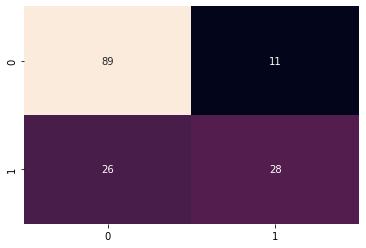

In [120]:
sns.heatmap(cm, cbar= False, fmt='g', annot= True)

#Data Training dengan algoritma SVM

In [103]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [104]:
svm_train_predict = classifier.predict(X_train)
training_data_svm = classification_report(svm_train_predict, Y_train)

In [105]:
print('Data Training Report : \n\n', training_data_svm)

Data Training Report : 

               precision    recall  f1-score   support

           0       0.89      0.80      0.84       445
           1       0.59      0.75      0.66       169

    accuracy                           0.79       614
   macro avg       0.74      0.77      0.75       614
weighted avg       0.81      0.79      0.79       614



## Data Testing

In [166]:
X_test_predict = classifier.predict(X_test)
test_data_svm = classification_report(X_test_predict, Y_test)

In [167]:
print('Data Testing Report : \n\n', test_data_svm)

Data Testing Report : 

               precision    recall  f1-score   support

           0       0.91      0.78      0.84       117
           1       0.52      0.76      0.62        37

    accuracy                           0.77       154
   macro avg       0.71      0.77      0.73       154
weighted avg       0.82      0.77      0.79       154



#Model prediksi

In [169]:
import warnings
warnings.filterwarnings("ignore")

data_input = (6, 148, 72, 35, 0, 33.6, 0.627, 50)
data_input_array = np.array(data_input)
data_input_reshape = data_input_array.reshape(1, -1)
std_data = scaler.transform(data_input_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('Positif Diabetes')
else :
  print('Negatif Diabetes')

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]
Negatif Diabetes


#Menyimpan file prediksi

In [ ]:
import pickle

In [ ]:
filename = 'mod_diabet.sav'
pickle.dump(classifier, open(filename,'wb'))